In [1]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.optimizers import SGD, Adam

In [4]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [12]:
import matplotlib.pyplot as plt

import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"

In [7]:
def getModel():
    model = Sequential()
    size = (224,224,3)
    
    #224x224x3->224x224x64
    model.add(Conv2D(input_shape=size,filters=64,kernel_size=(3,3),padding="same", activation="relu"))    
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    
    #224x224x64->112(224/2)x112x64
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    #112x112x64->112x112x128
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    
    #112x112x128->56x56x128
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    #56x56x128->56x56x256
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    
    #56x56x256->28x28x256
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    #28x28x256->28x28x512
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
        
    #28x28x512->14x14x512
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    #14x14x512->14x14x512
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    #14x14x512->7x7x512
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    
    #7x7x512->25088(7x7x512=25088)
    model.add(Flatten())
    #25088->4096
    model.add(Dense(units=4096,activation="relu"))
    #4096->4096
    model.add(Dense(units=4096,activation="relu"))
    #4096->2 categories(dog/cat) in this case
    model.add(Dense(units=2, activation="softmax"))
    return model

In [10]:
model = getModel()
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
ad = Adam(lr=0.1)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()

size = (224,224)

traind = ImageDataGenerator().flow_from_directory(directory="train", target_size=size)
testd = ImageDataGenerator().flow_from_directory(directory="test", target_size=size)
checkpoint = ModelCheckpoint("vgg16.h5", monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, 
                             mode='auto', period=1)

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

In [15]:
hist = model.fit_generator(steps_per_epoch=100, 
                           generator=traind, 
                           validation_data=testd, 
                           validation_steps=10, 
                           epochs=100)

Epoch 1/100


ResourceExhaustedError:  OOM when allocating tensor with shape[25088,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node gradients_1/dense_1_1/MatMul_grad/MatMul_1 (defined at C:\Users\liyuan\Anaconda3\envs\vgg16\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_4282]

Function call stack:
keras_scratch_graph


In [10]:
model.save_weights("trained_weight.h5")

In [27]:
model.save('vgg16_trained.h5')

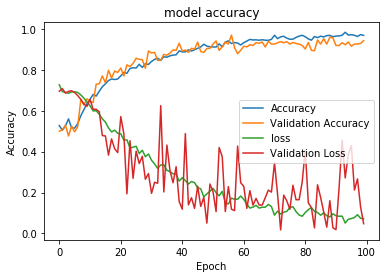

In [13]:

plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [8]:
from keras.models import load_model
saved_model = load_model("vgg16_trained.h5")

cat
0.78
0.22


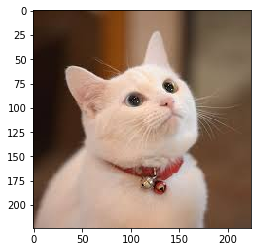

In [9]:
from keras.preprocessing import image
import numpy as np 
img = image.load_img("test5.jpeg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')

print('{:.2}'.format(output[0][0]))
print('{:.2}'.format(output[0][1]))
